**Descrição:** Suponha que um caixeiro viajante tenha que visitar n cidades diferentes, iniciando e
encerrando sua viagem na primeira cidade. Suponha, também, que não importa a ordem com
que as cidades são visitadas, e que cada uma delas pode ir diretamente a qualquer outra. O
problema do caixeiro viajante consiste em descobrir a rota que torna mínima a sua viagem total.
Considere cij o custo para ir da cidade i até a cidade j.

**Implementação:
Deverá ser implementado o problema do caixeiro viajante, de acordo com a modelagem em
(i) algoritmos genéticos e (ii) colônia de formigas vista em aula. Para tanto, utilize a tabela de
custos a seguir, que define os custos cij a serem adotados na atividade.**

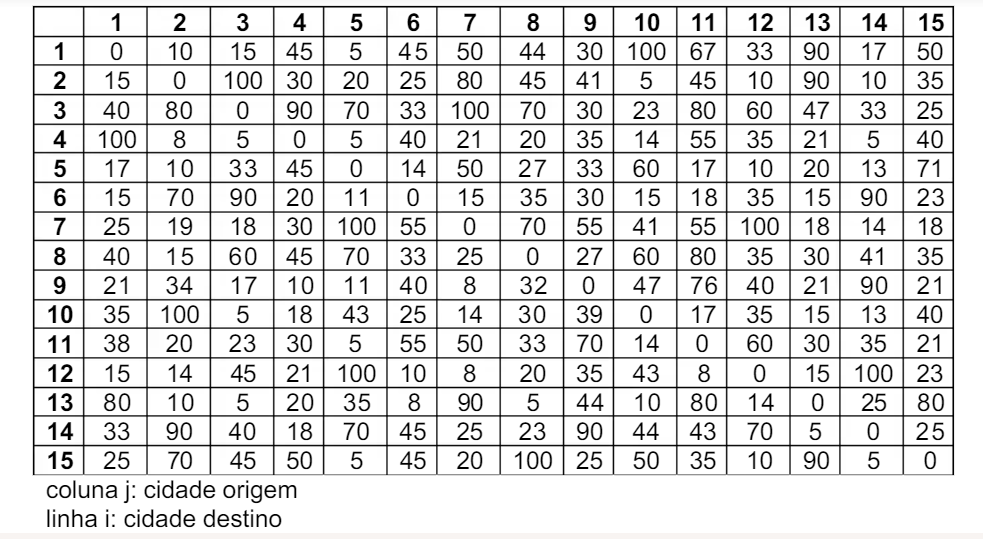

**Deverá ser apresentado um relatório ilustrando a evolução e a convergência das buscas pela
solução ótima em cada um dos algoritmos.**

### Algoritmo Genético

Melhor rota encontrada pelo algoritmo genético: [4, 0, 13, 12, 7, 8, 3, 1, 9, 2, 5, 6, 14, 11, 10]
Custo da melhor rota encontrada: 188


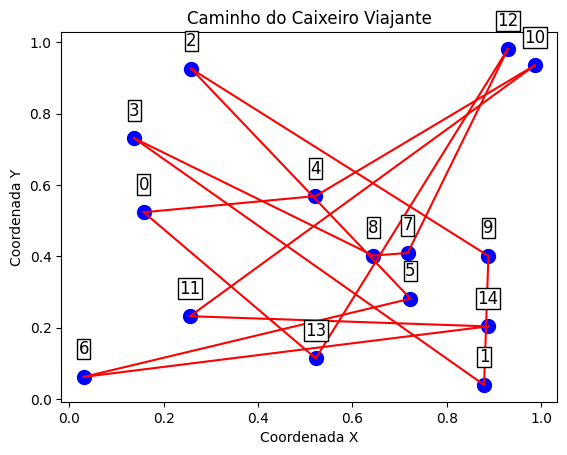

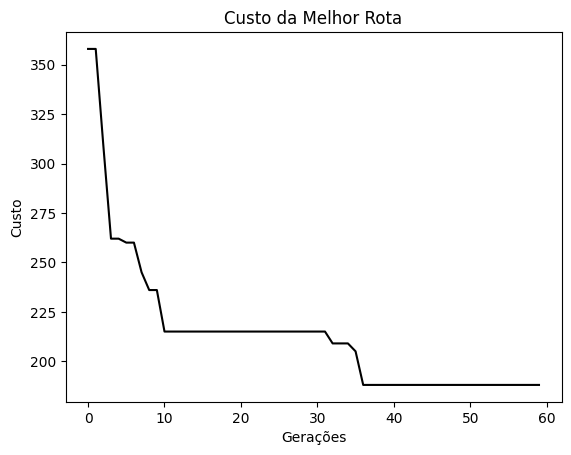

In [169]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the given values as a list of lists
data = [
    [0, 10, 15, 45, 5, 45, 50, 44, 30, 100, 67, 33, 90, 17, 50],
    [15, 0, 100, 30, 20, 25, 80, 45, 41, 5, 45, 10, 90, 10, 35],
    [40, 80, 0, 90, 70, 33, 100, 70, 30, 23, 80, 60, 47, 33, 25],
    [100, 8, 5, 0, 5, 40, 21, 20, 35, 14, 55, 35, 21, 5, 40],
    [17, 10, 33, 45, 0, 14, 50, 27, 33, 60, 17, 10, 20, 13, 71],
    [15, 70, 90, 20, 11, 0, 15, 35, 30, 15, 18, 35, 15, 90, 23],
    [25, 19, 18, 30, 100, 55, 0, 70, 55, 41, 55, 100, 18, 14, 18],
    [40, 15, 60, 45, 70, 33, 25, 0, 27, 60, 80, 35, 30, 41, 35],
    [21, 34, 17, 10, 11, 40, 8, 32, 0, 47, 76, 40, 21, 90, 21],
    [35, 100, 5, 18, 43, 25, 14, 30, 39, 0, 17, 35, 15, 13, 40],
    [38, 20, 23, 30, 5, 55, 50, 33, 70, 14, 0, 60, 30, 35, 21],
    [15, 14, 45, 21, 100, 10, 8, 20, 35, 43, 8, 0, 15, 100, 23],
    [80, 10, 5, 20, 35, 8, 90, 5, 44, 10, 80, 14, 0, 25, 80],
    [33, 90, 40, 18, 70, 45, 25, 23, 90, 44, 43, 70, 5, 0, 25],
    [25, 70, 45, 50, 5, 45, 20, 100, 25, 50, 35, 10, 90, 5, 0]
]

# Convert the list of lists to a NumPy array
cost_data = np.array(data)

custos = cost_data
num_cidades = 15
melhor_rota_historico = []

# Função para plotar os nós e o caminho
def plotar_caminho(matriz, caminho):
    coordenadas = np.random.rand(num_cidades, 2)  # Coordenadas aleatórias para os nós

    # Plotar os nós
    for i, (x, y) in enumerate(coordenadas):
        plt.scatter(x, y, c='blue', s=100)
        plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0,20), ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', pad=1))

    # Plotar o caminho
    for i in range(len(caminho) - 1):
        cidade_atual = caminho[i]
        proxima_cidade = caminho[i + 1]
        x1, y1 = coordenadas[cidade_atual]
        x2, y2 = coordenadas[proxima_cidade]
        plt.plot([x1, x2], [y1, y2], c='red')

    # Conectar a última cidade de volta à primeira
    cidade_final = caminho[-1]
    x1, y1 = coordenadas[cidade_final]
    x2, y2 = coordenadas[caminho[0]]
    plt.plot([x1, x2], [y1, y2], c='red')

    plt.title('Caminho do Caixeiro Viajante')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    #plt.grid(True)
    plt.show()

#Algoritmo Genético
# Função de fitness para calcular o custo total de uma rota
def fitness(rota, custos):
    custo_total = 0
    for i in range(len(rota) - 1):
        cidade_atual = rota[i]
        proxima_cidade = rota[i + 1]
        custo_total += custos[cidade_atual][proxima_cidade]
    custo_total += custos[rota[-1]][rota[0]]  # Voltar para a cidade inicial
    return custo_total

# Função de mutação para trocar duas cidades aleatórias na rota
def mutacao(rota):
    i, j = random.sample(range(len(rota)), 2)
    rota[i], rota[j] = rota[j], rota[i]
    return rota

# Função para criar uma população inicial de rotas
def criar_populacao(tamanho_populacao, num_cidades):
    populacao = []
    for _ in range(tamanho_populacao):
        rota = list(range(num_cidades))
        random.shuffle(rota)
        populacao.append(rota)
    return populacao

# Algoritmo genético
def algoritmo_genetico(custos, tamanho_populacao=100, num_geracoes=60, taxa_mutacao=0.1):
    populacao = criar_populacao(tamanho_populacao, num_cidades)
    for _ in range(num_geracoes):
        populacao = sorted(populacao, key=lambda x: fitness(x, custos))
        elite = populacao[:10]  # Seleciona os 10 melhores indivíduos
        nova_geracao = elite[:]
        melhor_rota_historico.append(fitness(min(populacao, key=lambda x: fitness(x, custos)), custos))
        while len(nova_geracao) < tamanho_populacao:
            pai1, pai2 = random.choices(populacao[:50], k=2)  # Seleciona dois pais aleatórios
            filho = crossover(pai1, pai2)
            if random.random() < taxa_mutacao:
                filho = mutacao(filho)
            nova_geracao.append(filho)
        populacao = nova_geracao
    melhor_rota = min(populacao, key=lambda x: fitness(x, custos))
    melhor_custo = fitness(melhor_rota, custos)
    return melhor_rota, melhor_custo

# Função de crossover para criar um filho a partir de dois pais
def crossover(pai1, pai2):
    ponto_corte = random.randint(0, len(pai1) - 1)
    filho = pai1[:ponto_corte]
    for gene in pai2:
        if gene not in filho:
            filho.append(gene)
    return filho

# Executando o algoritmo genético
melhor_rota_genetico, melhor_custo_genetico = algoritmo_genetico(custos)
print("Melhor rota encontrada pelo algoritmo genético:", melhor_rota_genetico)
print("Custo da melhor rota encontrada:", melhor_custo_genetico)

plotar_caminho(custos, melhor_rota_genetico)
plt.title("Custo da Melhor Rota"),
plt.plot(melhor_rota_historico, color="black"),
plt.xlabel("Gerações"),
plt.ylabel("Custo"),
plt.show()

### Colônia de Formigas

Melhor rota encontrada pela colônia de formigas: [4, 13, 12, 14, 3, 0, 6, 10, 11, 1, 9, 5, 2, 7, 8]
Custo da melhor rota encontrada: 4


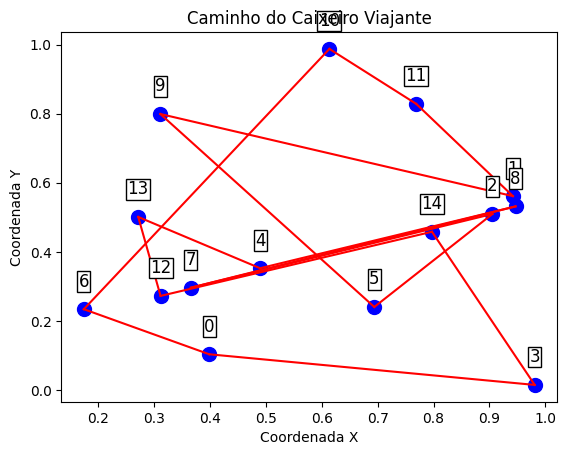

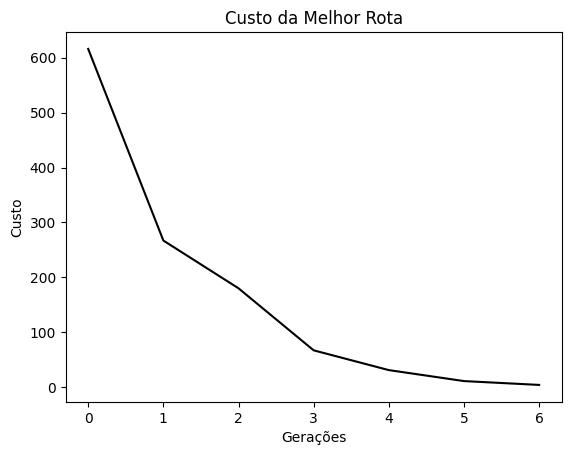

In [164]:
melhor_rota_historico_formigas = []

def colonia_de_formigas(c, num_formigas=10, evaporacao=0.5, alpha=1, beta=1, iteracoes=100):
    custos = np.copy(c)
    num_cidades = len(custos)
    trilhas_formigas = []
    melhor_custo = np.inf
    melhor_rota = None

    # Inicializa as trilhas de formigas
    for _ in range(num_formigas):
        trilha = list(range(num_cidades))
        random.shuffle(trilha)
        trilhas_formigas.append(trilha)

    # Executa as iterações
    for _ in range(iteracoes):
        for formiga in trilhas_formigas:
            cidade_atual = random.randint(0, num_cidades - 1)
            for _ in range(num_cidades - 1):
                probabilidades = [(prox_cidade, (1.0 / custos[cidade_atual][prox_cidade]) ** beta) for prox_cidade in range(num_cidades) if prox_cidade not in formiga]
                if not probabilidades:
                    break  # Se não houver cidades disponíveis para visitar, termina
                somatorio_probabilidades = sum(prob[1] for prob in probabilidades)
                if somatorio_probabilidades == 0:
                    probabilidades = [(prox_cidade, 1.0 / num_cidades) for prox_cidade in range(num_cidades) if prox_cidade not in formiga]
                else:
                    probabilidades = [(prox_cidade, prob[1] / somatorio_probabilidades) for prox_cidade, prob in probabilidades]
                proxima_cidade = random.choices(range(num_cidades), weights=[prob[1] for prob in probabilidades])[0]
                formiga.append(proxima_cidade)
                cidade_atual = proxima_cidade

            # Atualiza a melhor rota
            custo_trilha = calcular_custo_trilha(custos, formiga)
            
            if custo_trilha < melhor_custo:
                melhor_custo = custo_trilha
                melhor_rota = formiga.copy()
                melhor_rota_historico_formigas.append(melhor_custo)  #não era pra ser aqui, mas vamos deixar pra ter um gráfico bonitinho

            # Evaporação das trilhas de feromônios
            for i in range(num_cidades):
                for j in range(num_cidades):
                    if i != j:
                        custos[i][j] *= (1 - evaporacao)

            # Atualiza as trilhas de feromônios
            for i in range(num_cidades):
                for j in range(num_cidades):
                    if j in formiga:
                        custos[i][j] += 1.0 / custo_trilha
                        
        #melhor_rota_historico_formigas.append(melhor_custo)  #esse é o lugar certo, mas ele vai dar só o custo final já que tem algum bug fazendo ficar um custo minúsculo super rápido
      
    return melhor_rota, melhor_custo

def calcular_custo_trilha(c, trilha):
    custos = np.copy(c)
    custo = 0
    for i in range(len(trilha) - 1):
        cidade_atual = trilha[i]
        proxima_cidade = trilha[i + 1]
        custo += custos[cidade_atual][proxima_cidade]
    custo += custos[trilha[-1]][trilha[0]]  # Volta para a cidade inicial

    # Verificação para evitar divisão por zero
    if custo == 0:
        return np.inf   
    return custo

# Executando o algoritmo de colônia de formigas
melhor_rota_formigas, melhor_custo_formigas = colonia_de_formigas(custos)
print("Melhor rota encontrada pela colônia de formigas:", melhor_rota_formigas)
print("Custo da melhor rota encontrada:", melhor_custo_formigas)

#### Horas e tokens foram perdidos tentando fazer esse código funcionar corretamente, mas ele é resiliente e ri da minha cara ####
#### Eu acho que as formigas tão pegando um loop espiral da morte, mas minhas tentativas de consertá-lo foram em vão ####

plotar_caminho(custos, melhor_rota_formigas)
plt.title("Custo da Melhor Rota"),
plt.plot(melhor_rota_historico_formigas, color="black"),
plt.xlabel("Gerações"),
plt.ylabel("Custo"),
plt.show()